# 이미지 처리: torchvision.transforms. 크기 변경, Tensor로 전환, 차원 변환

In [1]:
!pip install torchvision

Defaulting to user installation because normal site-packages is not writeable


In [2]:
%matplotlib inline

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.utils as utils
import torchvision.datasets as dsets
import torchvision.transforms as transforms

is_cuda = torch.cuda.is_available()
device = torch.device('cuda' if is_cuda else 'cpu')

273 365


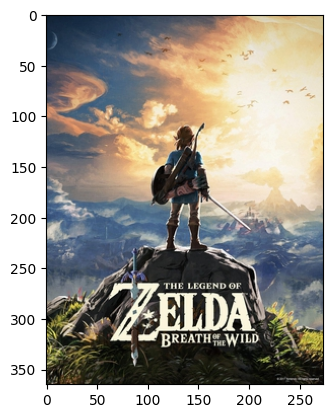

In [3]:
# PIL = Python Image Library
from PIL import Image
import matplotlib.pyplot as plt

org = Image.open('zelda.jpg')
plt.imshow(org)
w, h = org.size
print(w, h)

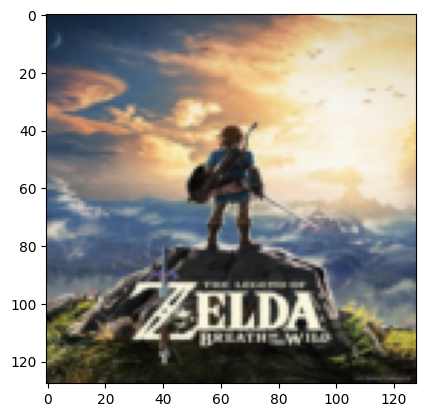

In [4]:
from torchvision import transforms

compose = transforms.Compose([transforms.Resize((128,128))])

resized = compose(org)
plt.imshow(resized)

In [5]:
compose = transforms.Compose([transforms.Resize((32,32)), transforms.ToTensor()])

t = compose(org)
print(t.shape)

torch.Size([3, 32, 32])


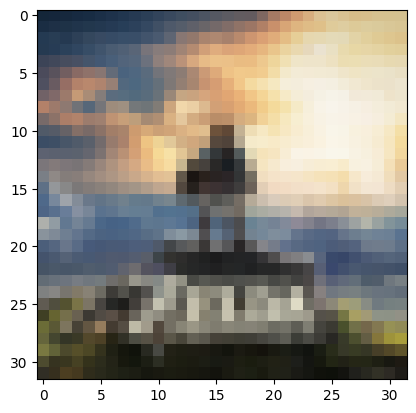

In [6]:
compose = transforms.Compose([transforms.ToPILImage()])

p = compose(t)
plt.imshow(p)

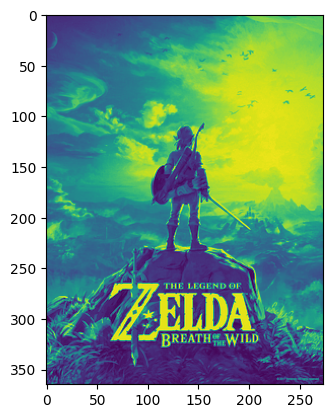

In [7]:
compose = transforms.Compose([transforms.Grayscale()])
g = compose(org)
plt.imshow(g)
plt.show()

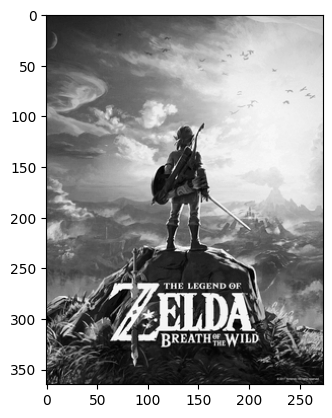

In [8]:
plt.imshow(g, cmap='gray')
plt.show()

In [9]:
compose = transforms.Compose([transforms.Resize((128,128)), transforms.ToTensor()])
t = compose(org)
print(t.mean(), t.std())

tensor(0.5011) tensor(0.2768)


In [10]:
# Normalize를 통해 skew를 없애고 더 학습이 잘 되게 함

compose = transforms.Compose([transforms.Resize((128,128)), 
                              transforms.ToTensor(),
                              transforms.Normalize(mean=(0.5,0.5,0.5), std=(0.5,0.5,0.5))
                             ])
t = compose(org)
print(t.mean(), t.std())

tensor(0.0022) tensor(0.5535)


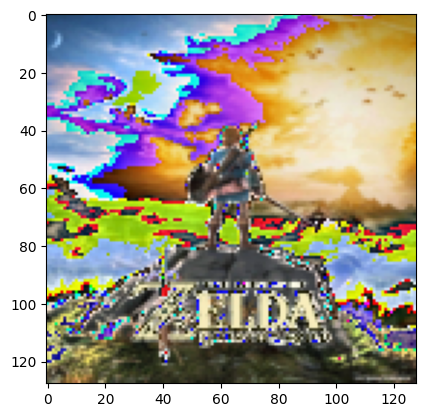

In [11]:
compose = transforms.Compose([transforms.ToPILImage()])

p = compose(t)
plt.imshow(p)

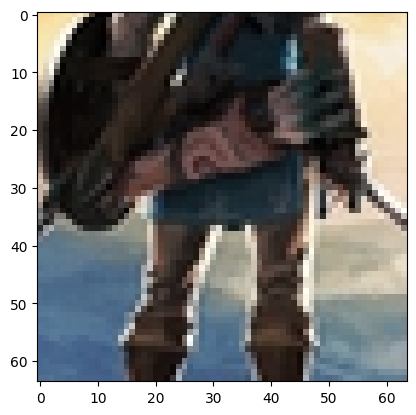

In [12]:
compose = transforms.Compose([transforms.CenterCrop(64)])
g = compose(org)
plt.imshow(g)
plt.show()

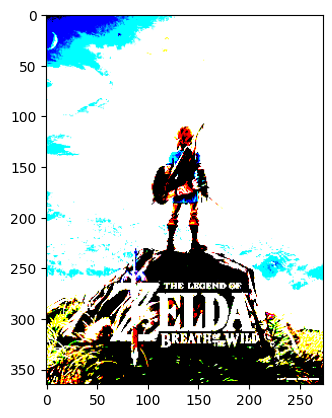

In [13]:
compose = transforms.Compose([transforms.ColorJitter(brightness=10, contrast=10, saturation=10, hue=0)])
g = compose(org)
plt.imshow(g)
plt.show()

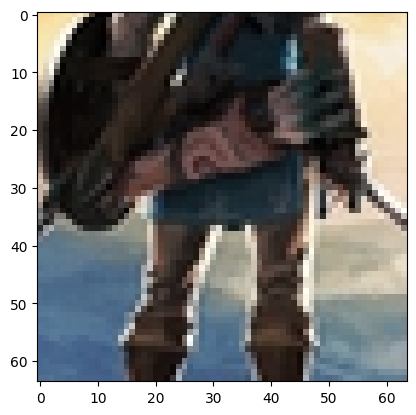

In [14]:
compose = transforms.Compose([transforms.FiveCrop(64)])
g = compose(org)
plt.imshow(g[4])
plt.show()

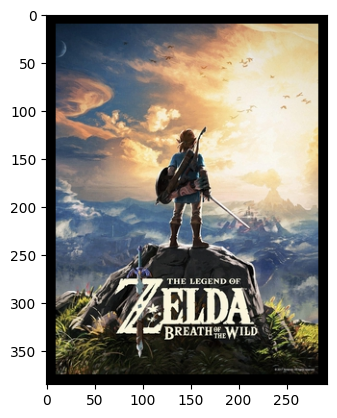

In [15]:
compose = transforms.Compose([transforms.Pad(10)])
g = compose(org)
plt.imshow(g)
plt.show()

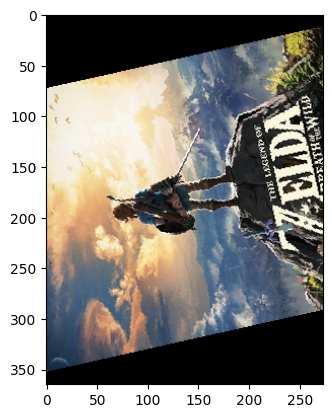

In [19]:
compose = transforms.Compose([transforms.RandomAffine(360)])
g = compose(org)
plt.imshow(g)
plt.show()